<a href="https://colab.research.google.com/github/komal05-web/traderperformance-vs.-marketsentiment/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective:Analyze trade performance VS sentiment



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
trader_df = pd.read_csv("/content/historical_data.csv")
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")

/tmp/ipython-input-1352947065.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trader_df = pd.read_csv("/content/historical_data.csv")


In [6]:
trader_df.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
sentiment_df.head(5)


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [9]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
trader_df['date'] = trader_df['Timestamp IST'].dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'])

In [10]:
trader_agg = trader_df.groupby(['date', 'Account']).agg({
    'Closed PnL': 'sum',
    'Size USD': 'sum',
    'Fee': 'sum',
    'Side': lambda x: (x == 'BUY').sum() / len(x)  # Fraction of BUY trades
}).reset_index()
trader_agg.rename(columns={'Side': 'Buy_Fraction'}, inplace=True)

In [11]:
merged_df = pd.merge(trader_agg, sentiment_df, on='date', how='inner')

In [12]:
correlation = merged_df['value'].corr(merged_df['Closed PnL'])
print(f"Correlation between Sentiment Value and Closed PnL: {correlation:.2f}")


Correlation between Sentiment Value and Closed PnL: -0.03


In [13]:
pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean()
print("Average Closed PnL by Sentiment Classification:")
print(pnl_by_sentiment)

Average Closed PnL by Sentiment Classification:
classification
Extreme Fear     9910.334728
Extreme Greed    6858.058228
Fear             9401.033121
Greed            4426.385118
Neutral          4879.162857
Name: Closed PnL, dtype: float64


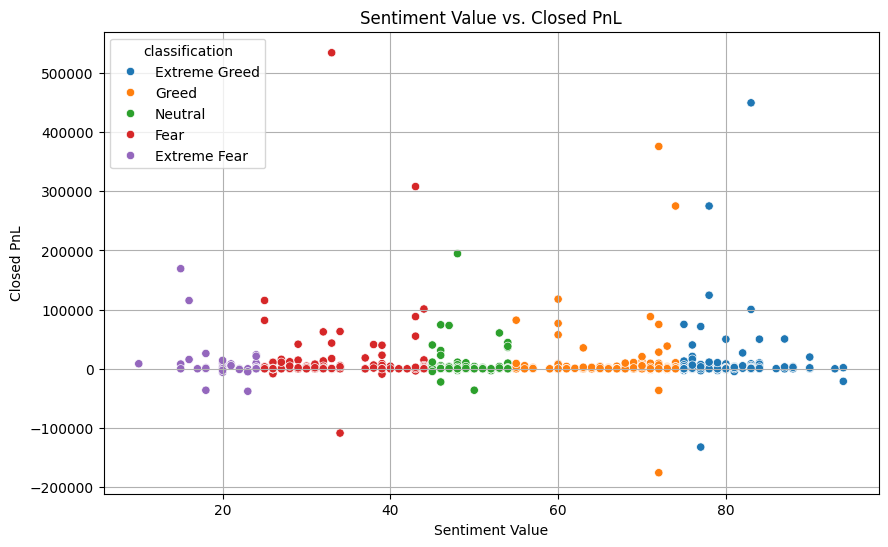

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='value', y='Closed PnL', hue='classification')
plt.title('Sentiment Value vs. Closed PnL')
plt.xlabel('Sentiment Value')
plt.ylabel('Closed PnL')
plt.grid(True)
plt.show()

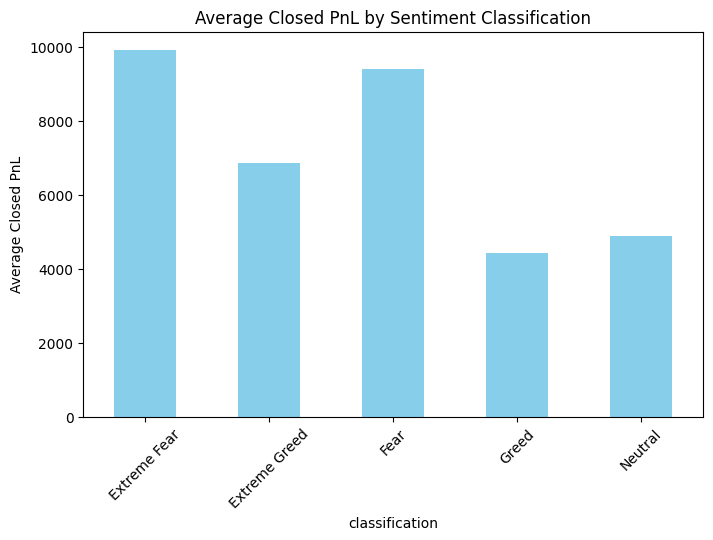

In [15]:
plt.figure(figsize=(8, 5))
pnl_by_sentiment.plot(kind='bar', color='skyblue')
plt.title('Average Closed PnL by Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.show()


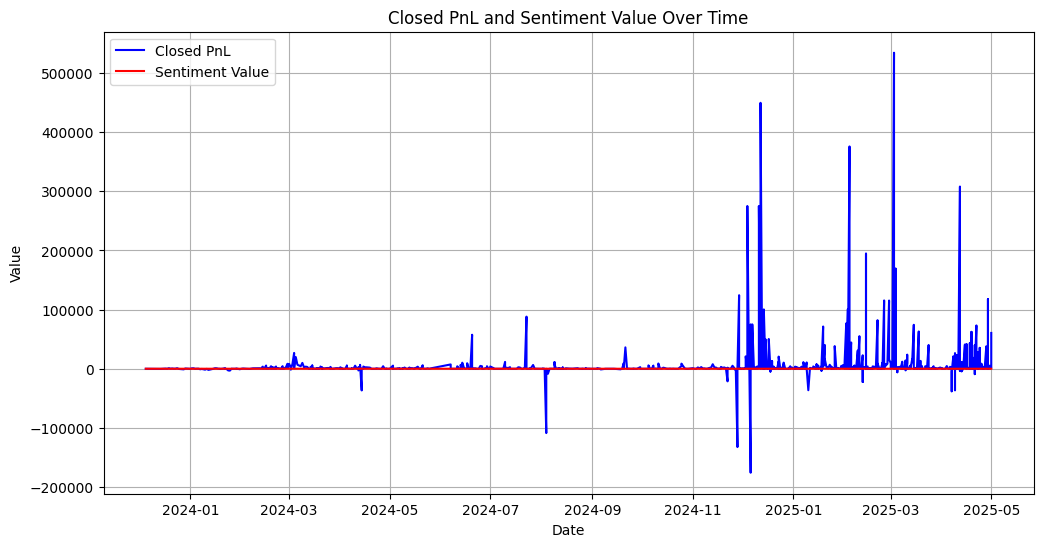

In [16]:
merged_df.set_index('date', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(merged_df.index, merged_df['Closed PnL'], label='Closed PnL', color='blue')
plt.plot(merged_df.index, merged_df['value'], label='Sentiment Value', color='red')
plt.title('Closed PnL and Sentiment Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
print("\nSummary Statistics for Merged Data:")
print(merged_df.describe())


Summary Statistics for Merged Data:
          Closed PnL      Size USD           Fee  Buy_Fraction     timestamp  \
count     906.000000  9.060000e+02    906.000000    906.000000  9.060000e+02   
mean     6349.353447  7.754650e+05    158.647891      0.528351  1.728703e+09   
std     35908.227214  3.653546e+06    678.400431      0.389886  1.261999e+07   
min   -175611.000056  1.000000e-01     -4.847684      0.000000  1.701754e+09   
25%         0.000000  2.999956e+04      4.985422      0.095312  1.718429e+09   
50%       225.314920  1.087005e+05     24.378542      0.538462  1.733031e+09   
75%      2227.760425  3.127683e+05     77.995688      1.000000  1.739425e+09   
max    533974.662903  5.125045e+07  10554.753586      1.000000  1.746077e+09   

            value  
count  906.000000  
mean    58.684327  
std     19.138683  
min     10.000000  
25%     45.000000  
50%     65.000000  
75%     74.000000  
max     94.000000  


In [18]:
high_pnl_greed = merged_df[(merged_df['classification'].isin(['Greed', 'Extreme Greed'])) & (merged_df['Closed PnL'] > 0)]
print(f"\nNumber of days with positive PnL in Greed periods: {len(high_pnl_greed)}")



Number of days with positive PnL in Greed periods: 309


In [19]:
merged_df.to_csv('merged_analysis.csv', index=True)
print("\nAnalysis complete. Results saved to 'merged_analysis.csv'.")


Analysis complete. Results saved to 'merged_analysis.csv'.
